In [1]:
# Installing Libraries

! pip install pandas
! pip install matplotlib
! pip install seaborn 


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Importing Required Libraries

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
# Loading The Dataset

df=pd.read_excel('Blinkit.xlsx')

In [4]:
# Checking the Dataset

df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
# All Information 

print(f"Total Rows and Columns = {df.shape}")
print(f"\nTotal Null Values In Each Column : \n{df.isnull().sum()}")
print(f"\nAll Information : \n{df.describe()}")

Total Rows and Columns = (8523, 12)

Total Null Values In Each Column : 
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

All Information : 
       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.

In [6]:
# Checking Data Types

df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
# Replacing Categorical Values 

df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [8]:
# Replacing Null Values 

df['Outlet_Size']=df['Outlet_Size'].fillna('Unknown')
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [9]:
# Dropping Extra Columns 

df.drop(columns=('Irem_Fat_Content'),inplace=True)

KeyError: "['Irem_Fat_Content'] not found in axis"

In [10]:
# Dropping Duplicates 

df.drop_duplicates(inplace=True)

In [11]:
# Data Formatting 

df.rename(columns={'Item_Identifier':'Identifier','Item_Weight':'Weight','Item_Fat_Content':'Fat_Content','Item_Visibility':'Visibility','Item_MRP':'MRP','Outlet_Size':'Size','Outlet_Location_Type':'Location_Type','Item_Outlet_Sales':'Sales'},inplace=True)

In [12]:
# Checking Count for the Column

df['Outlet_Establishment_Year'].describe()

count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [13]:
# Adding New Column 

df['Price_Category']=pd.qcut(df['MRP'],q=3,labels=['Low','Medium','High'])

In [14]:
# Average Sales By Each Location Type 

df.groupby('Location_Type')['Sales'].mean()

Location_Type
Tier 1    1876.909159
Tier 2    2323.990559
Tier 3    2279.627651
Name: Sales, dtype: float64

In [15]:
# Total MRP as per Item Type 

df.groupby('Item_Type')['MRP'].sum()

Item_Type
Baking Goods              81894.7364
Breads                    35379.1198
Breakfast                 15596.6966
Canned                    90706.7270
Dairy                    101276.4596
Frozen Foods             118558.8814
Fruits and Vegetables    178124.0810
Hard Drinks               29334.6766
Health and Hygiene        68025.8388
Household                135976.5254
Meat                      59449.8638
Others                    22451.8916
Seafood                    9077.8700
Snack Foods              175433.9204
Soft Drinks               58514.1650
Starchy Foods             21880.0274
Name: MRP, dtype: float64

In [16]:
# Total MRP,Average Sales and Max Weight as per Outlet Type 

df.groupby('Outlet_Type').agg({'MRP':'sum','Weight':'max','Sales':'mean'})

,MRP,Weight,Sales
Outlet_Type,,,
Grocery Store,151939.1470,21.350000,339.828500
Supermarket Type1,787549.8868,21.350000,2316.181148
Supermarket Type2,131477.7724,21.350000,1995.498739
Supermarket Type3,130714.6746,12.857645,3694.038558


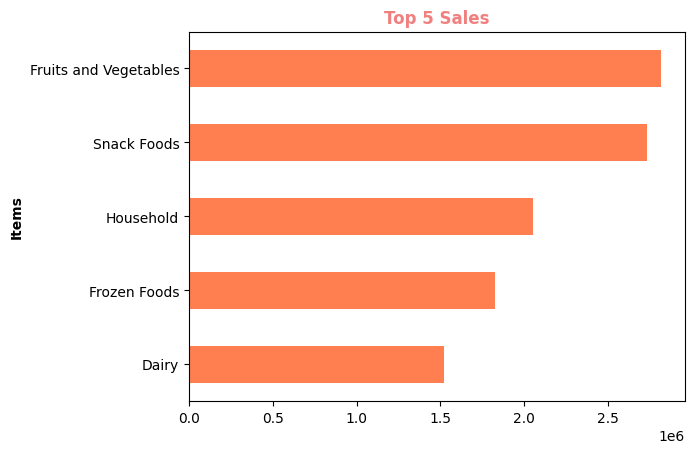

In [17]:
# Horizontal Bar Chart

# Top 5 Item By Total Sales 
top5=df.groupby('Item_Type')['Sales'].sum().sort_values(ascending=False)
top5.head(5).sort_values().plot(kind='barh',color='coral')
plt.xlabel("")
plt.ylabel('Items',fontweight='bold')
plt.title('Top 5 Sales',fontweight='bold',color='lightcoral')
plt.show()

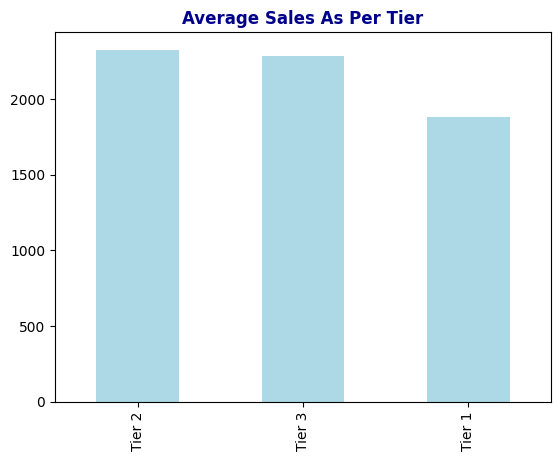

In [18]:
# Bar-Chart : 1 

# Average Sales By Each Tier 
df.groupby('Location_Type')['Sales'].mean().sort_values(ascending=False).plot(kind='bar',color='lightblue')
plt.title('Average Sales As Per Tier',fontweight='bold',color='darkblue')
plt.xlabel('')
plt.show()

Text(0, 0.5, '')

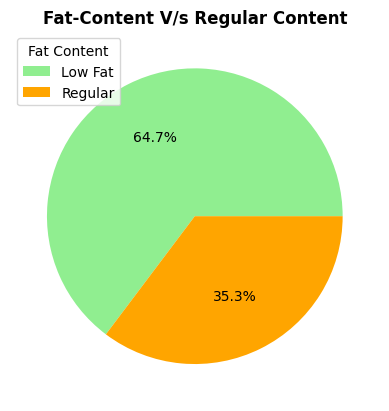

In [19]:
# Pie-Chart 1

color=['lightgreen','orange']
labels=['Low Fat','Regular']
size=df['Fat_Content'].value_counts()
plt.pie(size,labels=['']*len(labels),autopct='%0.1f%%',colors=color)
plt.title('Fat-Content V/s Regular Content',fontweight='bold',color='black')
plt.legend(labels,title='Fat Content')
plt.ylabel("")

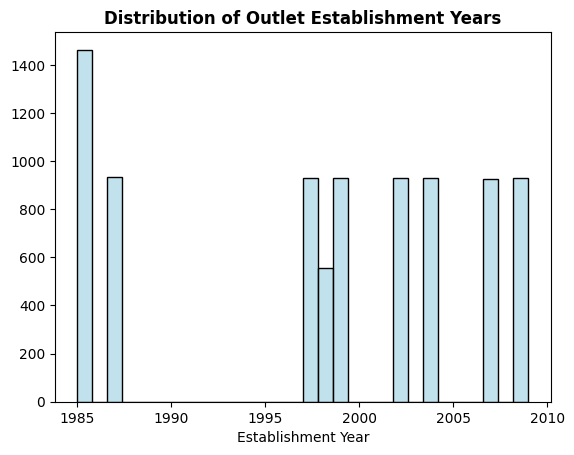

In [20]:
# Histogram

sns.histplot(df['Outlet_Establishment_Year'],bins=30,color='lightblue')
plt.title("Distribution of Outlet Establishment Years",fontweight='bold')
plt.xlabel("Establishment Year")
plt.ylabel("")
plt.show()

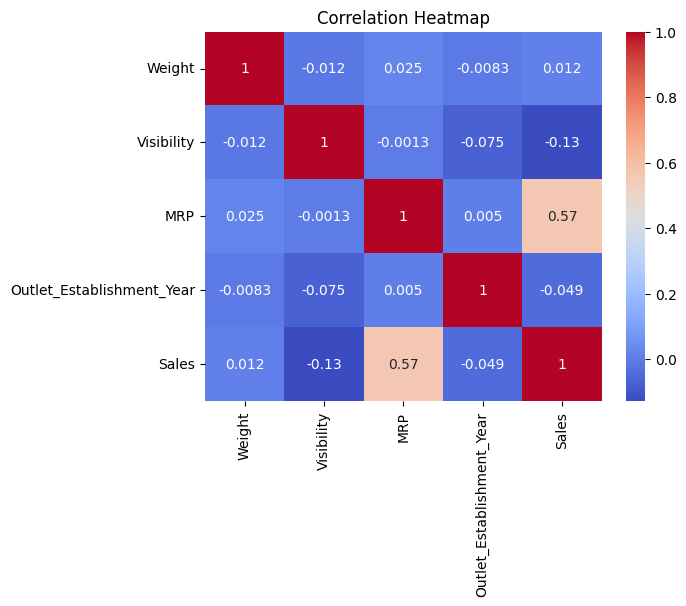

In [21]:
# Heatmap

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

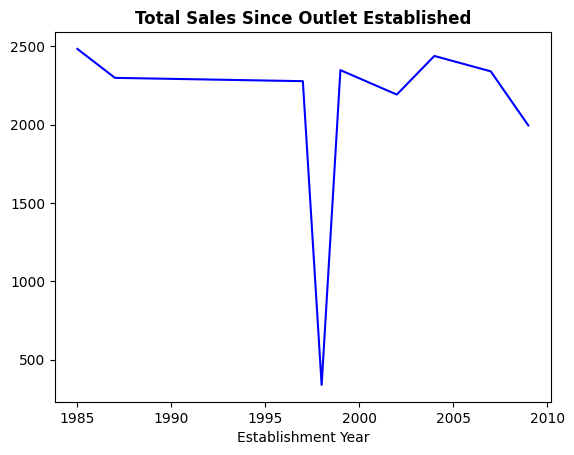

In [22]:
# Line Chart

df.groupby('Outlet_Establishment_Year')['Sales'].mean().plot(kind='line',color='blue')
plt.title('Total Sales Since Outlet Established',fontweight='bold',color='black')
plt.xlabel('Establishment Year')
plt.ylabel("")
plt.show()

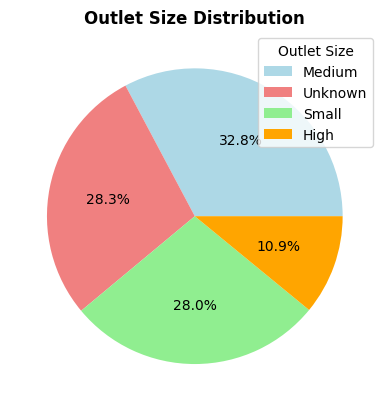

In [23]:
# Pie-Chart 2

sizes=df['Size'].value_counts()
labels=sizes.index
plt.pie(sizes,labels=['']*len(labels),autopct='%0.1f%%',colors=['lightblue','lightcoral','lightgreen','orange'])
plt.title('Outlet Size Distribution',fontweight='bold')
plt.legend(labels, title="Outlet Size")
plt.ylabel("")
plt.show()

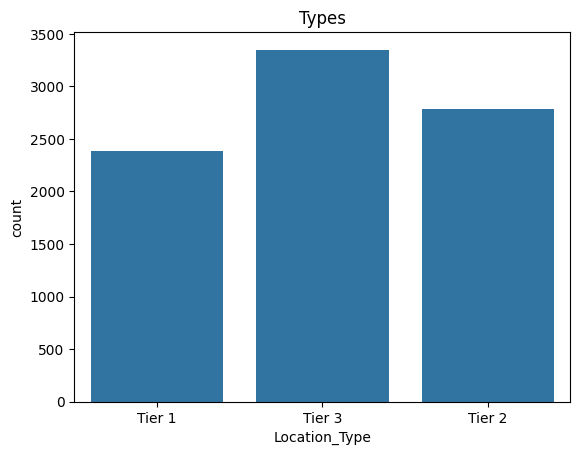

In [24]:
# Countplot

sns.countplot(x='Location_Type',data=df)
plt.title('Types')
plt.show()

Text(0.5, 0.98, 'Each Item Type Sales')

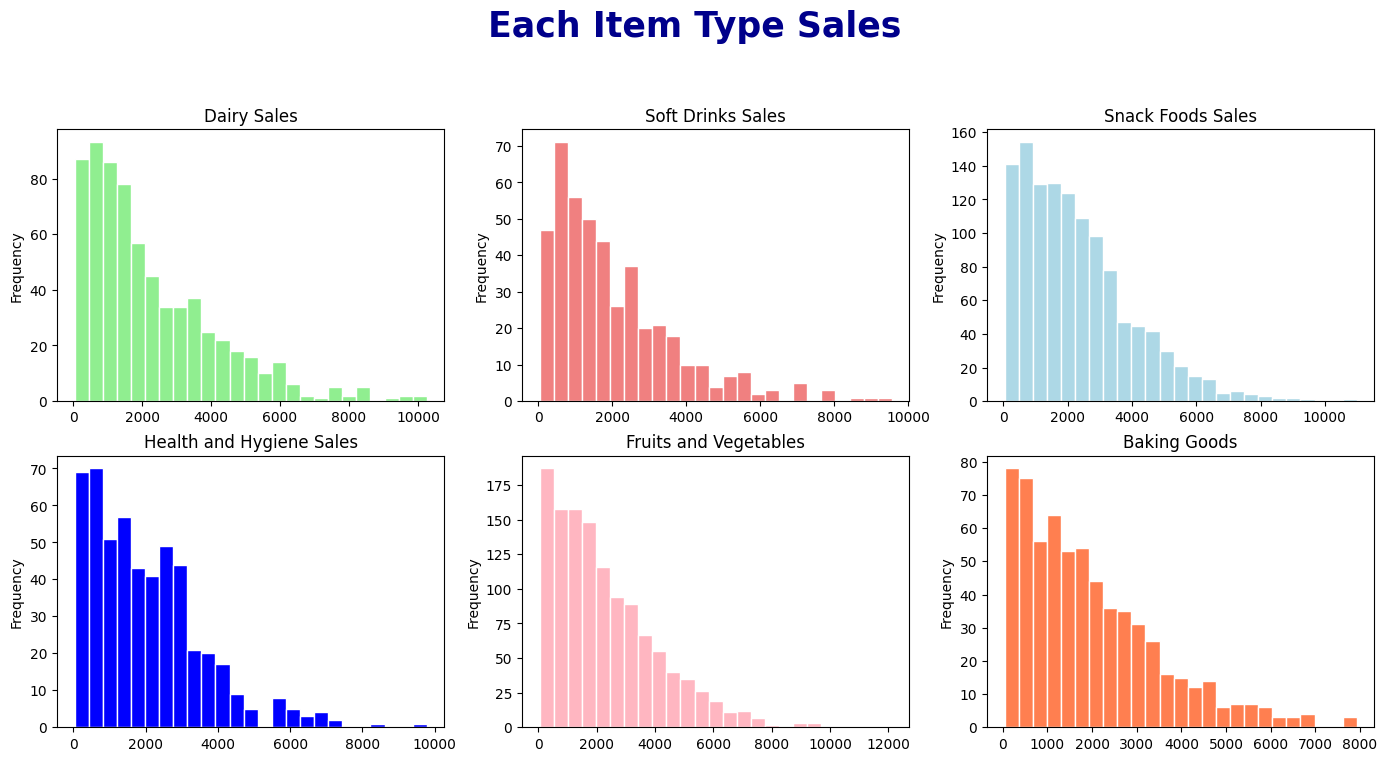

In [25]:
# Item Sales Dashboard

plt.figure(figsize=(17,12))
plt.subplot(3,3,1)
df[df['Item_Type']=='Dairy']['Sales'].plot(kind='hist',bins=25,color='lightgreen',edgecolor='white')
plt.title('Dairy Sales')

plt.subplot(3,3,2)
df[df['Item_Type']=='Soft Drinks']['Sales'].plot(kind='hist',bins=25,color='lightcoral',edgecolor='white')
plt.title('Soft Drinks Sales')

plt.subplot(3,3,3)
df[df['Item_Type']=='Snack Foods']['Sales'].plot(kind='hist',bins=25,color='lightblue',edgecolor='white')
plt.title('Snack Foods Sales')

plt.subplot(3,3,4)
df[df['Item_Type']=='Health and Hygiene']['Sales'].plot(kind='hist',bins=25,color='blue',edgecolor='white')
plt.title('Health and Hygiene Sales')

plt.subplot(3,3,5)
df[df['Item_Type']=='Fruits and Vegetables']['Sales'].plot(kind='hist',bins=25,color='lightpink',edgecolor='white')
plt.title('Fruits and Vegetables')

plt.subplot(3,3,6)
df[df['Item_Type']=='Baking Goods']['Sales'].plot(kind='hist',bins=25,color='coral',edgecolor='white')
plt.title('Baking Goods')

plt.suptitle('Each Item Type Sales',fontweight='bold',color='darkblue',fontsize=25)

Text(0.5, 1.0, 'Average MRP in Each Item')

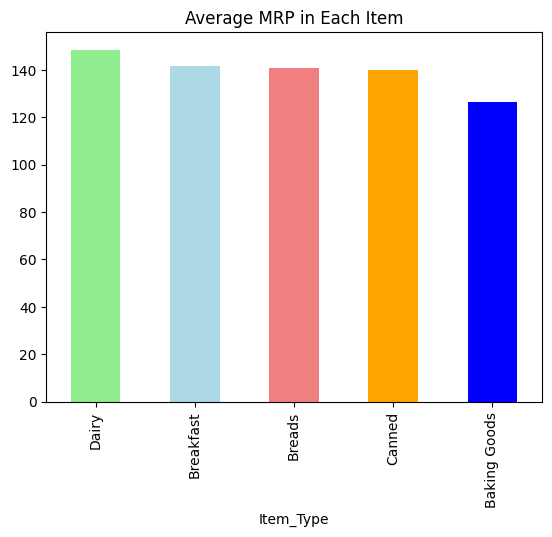

In [26]:
# Bar-Chart : 2

TOP5_MRP=df.groupby('Item_Type')['MRP'].mean().head(5)
TOP5_MRP.sort_values(ascending=False).plot(kind='bar',color=['lightgreen','lightblue','lightcoral','orange','blue'])
plt.title('Average MRP in Each Item')

In [27]:
# Insights Summary Made Out of Visualizations and After Cleaning 
print('Insights Summary')
print("\n 1)Top 5 Sales Were Made By Item Types :\n  i) Fruits and Vegetables \n  ii) Snack Foods \n  iii) Household \n  iv) Frozen Foods \n  v) Dairy")
print("\n 2) Tier 2 has more Average Sales than other Tiers")
print("\n 3) Percentage of Low Fat is more than Regular Fat in Items")
print("\n 4) Between 1995 and 2000 the establishment of Outlets has been decreased") 
print("\n 5) Among the Outlets Over all Medium Size Outlets have more count and similarly Tier 3 Location Type are more")
print("\n 6) Dairy has Average MRP among all the Types")
print("\n 7) In 1985 More Outlet were Established")

Insights Summary

 1)Top 5 Sales Were Made By Item Types :
  i) Fruits and Vegetables 
  ii) Snack Foods 
  iii) Household 
  iv) Frozen Foods 
  v) Dairy

 2) Tier 2 has more Average Sales than other Tiers

 3) Percentage of Low Fat is more than Regular Fat in Items

 4) Between 1995 and 2000 the establishment of Outlets has been decreased

 5) Among the Outlets Over all Medium Size Outlets have more count and similarly Tier 3 Location Type are more

 6) Dairy has Average MRP among all the Types

 7) In 1985 More Outlet were Established
